In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [19]:
load = load_boston()
print(load.keys())
print(load.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [20]:
X, y, features = load.data, load.target, load.feature_names
print("X:")
print(X.shape)
print(X)
print("")
print("y:")
print(y.shape)
print(y)
print("")
print("features")
print(features)

X:
(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

y:
(506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1

In [21]:
X_DF = pd.DataFrame(X, columns = features)
X_DF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
feature_descr = {
    "CRIM": "per capita crime rate by town",
    "ZN": "proportion of residential land zoned for lots over 25,000 sq.ft.",
    "INDUS": "proportion of non-retail business acres per town",
    "CHAS": "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
    "NOX": "nitric oxides concentration (parts per 10 million)",
    "RM": "average number of rooms per dwelling",
    "AGE": "proportion of owner-occupied units built prior to 1940",
    "DIS": "weighted distances to five Boston employment centres",
    "RAD": "index of accessibility to radial highways",
    "TAX": "full-value property-tax rate per $10,000",
    "PTRATIO": "pupil-teacher ratio by town",
    "B": "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
    "LSTAT": "% lower status of the population",
    "MEDV": "Median value of owner-occupied homes in $1000's"
}

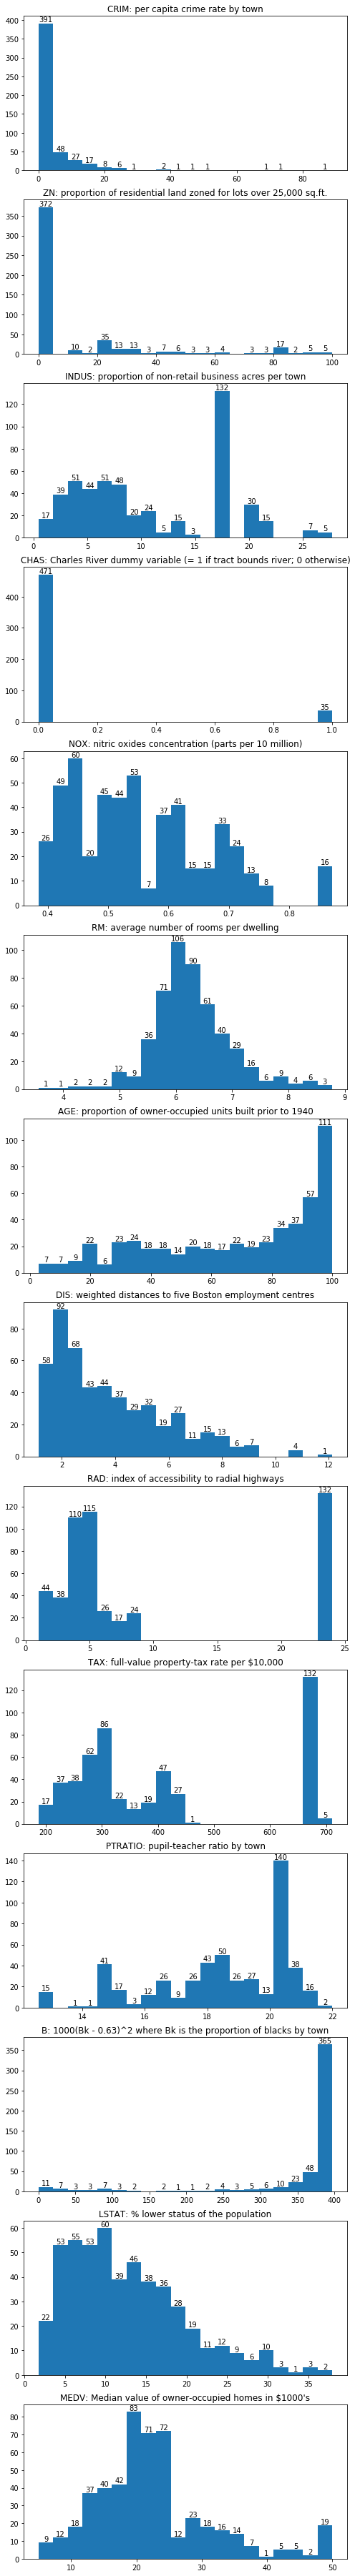

In [23]:
fig, axs = plt.subplots(14, 1, figsize=(7, 50))
fig.tight_layout(h_pad=2)
for i, col in enumerate(X_DF):
    ax = axs[i]
    counts, bins, _ = ax.hist(col, data=X_DF, bins=20)
    for i, height in enumerate(counts):
        ax.annotate(
            str(int(height)) if height!=0 else "", 
            xy=((bins[i]+bins[i+1]) / 2, height), 
            xytext=(0, 0), 
            textcoords="offset points", 
            ha="center", 
            va="bottom"
        )
    ax.title.set_text(col + ": " + feature_descr[col])
counts, bins, _ = axs[13].hist(y, bins=20)
for i, height in enumerate(counts):
    axs[13].annotate(
        str(int(height)) if height!=0 else "",
        xy=((bins[i]+bins[i+1]) / 2, height),
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="bottom"
    )
axs[13].title.set_text("MEDV: Median value of owner-occupied homes in $1000's")

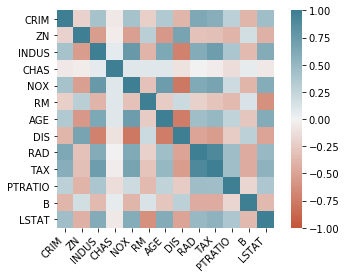

In [24]:
corr = X_DF.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
labels = ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
print('training R^2: {:.2f}'.format(reg.score(X_train, y_train)))
print('testing R^2: {:.2f}\n'.format(reg.score(X_test, y_test)))
print('training RMSE: {}'.format(mean_squared_error(y_train, reg.predict(X_train))))
print('testing RMSE: {}\n'.format(mean_squared_error(y_test, reg.predict(X_test))))
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(pd.DataFrame({
        'coef': np.insert(reg.coef_, 0, reg.intercept_), 
        'descr': np.insert(X_DF.columns, 0, 'int')
    }))
type(reg.coef_)

training R^2: 0.78
testing R^2: 0.55

training RMSE: 18.805178499116753
testing RMSE: 36.946441473513175

     coef    descr
0   28.76      int
1   -0.11     CRIM
2    0.03       ZN
3    0.06    INDUS
4    2.77     CHAS
5  -17.26      NOX
6    4.66       RM
7    0.01      AGE
8   -1.18      DIS
9    0.29      RAD
10  -0.01      TAX
11  -0.91  PTRATIO
12   0.01        B
13  -0.57    LSTAT


numpy.ndarray

In [36]:
print(X_train)
X_train_sc = StandardScaler().fit_transform(X_train)
print("")
print(X_train_sc)

[[5.49700e-02 0.00000e+00 5.19000e+00 ... 2.02000e+01 3.96900e+02
  9.74000e+00]
 [1.55757e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.68740e+02
  1.81300e+01]
 [9.06000e-03 9.00000e+01 2.97000e+00 ... 1.53000e+01 3.94720e+02
  7.85000e+00]
 ...
 [3.58400e-02 8.00000e+01 3.37000e+00 ... 1.61000e+01 3.96900e+02
  4.67000e+00]
 [2.14090e-01 2.20000e+01 5.86000e+00 ... 1.91000e+01 3.77070e+02
  3.59000e+00]
 [4.62960e-01 0.00000e+00 6.20000e+00 ... 1.74000e+01 3.76140e+02
  5.25000e+00]]

[[-0.44907558 -0.51010604 -0.84105141 ...  0.83009565  0.43081635
  -0.37104212]
 [ 1.7701379  -0.51010604  1.01060935 ...  0.83009565  0.11927366
   0.84614381]
 [-0.45563997  3.23005438 -1.15946248 ... -1.41020067  0.40669834
  -0.64523538]
 ...
 [-0.45181086  2.814481   -1.10209111 ... -1.044438    0.43081635
  -1.10657642]
 [-0.42632399  0.4041554  -0.74495438 ...  0.32717199  0.211431
  -1.26325828]
 [-0.3907396  -0.51010604 -0.69618872 ... -0.45007367  0.20114213
  -1.02243245]]


In [37]:
print(y_train)
y_train_sc = StandardScaler().fit_transform(y_train)
print("")
print(y_train_sc)

[19.  19.1 32.2 24.4 22.2 25.1  9.6  7.  43.5 21.9 29.1 23.3 23.9 19.1
 23.9 19.5 23.8 28.7 22.6 41.3 30.7 23.1 16.6 18.1 19.8 20.4 37.3 14.5
 24.5 32.5 18.3 12.5 32.  27.  21.7 14.1 10.5 20.1 14.9 19.9 15.6 16.6
 19.3 16.5 28.7 21.6 21.  26.4 34.9 45.4 24.8 24.5 18.3 26.7 18.5 24.7
 17.1 14.5 20.7 31.6 30.3 23.3 31.5 15.2 21.2 33.1 24.1 48.3 13.8 23.4
  9.7 22.  16.1 10.4 50.  21.7 50.  21.2 18.9 13.3 13.1  8.3 19.4 15.6
 14.8 18.4 11.7 17.3 15.  33.  22.9 42.8 14.  22.8 14.6 22.  23.2  7.5
 16.2 20.9 27.5 22.3 22.5  5.6 19.3 10.9 23.2 32.4 50.  30.1 36.2 22.9
  8.3 41.7 21.2 18.5 13.5 35.4 20.  22.1 20.8 20.1 27.1 23.7  8.5 18.9
 17.4 17.8 22.  22.8 23.7 20.5 22.7 13.4 21.4 18.9 26.2 13.1 13.4 18.7
 19.9 20.5 36.2 17.5 28.4 33.3 20.4 20.7 19.4 20.6 25.  23.8 50.  23.9
 17.6 17.7 11.3 12.7 13.8 11.9 50.  24.6  8.8 33.2 21.8 35.2 32.7 20.8
 21.7 33.2 14.9 37.  19.4  7.2 21.7 26.4 18.8 31.  23.  23.6 23.9 35.4
 20.  23.1 18.2 13.6 31.5 43.8 13.9 18.8 19.3 16.8 19.7 23.1 17.1 26.6
 37.2 

ValueError: Expected 2D array, got 1D array instead:
array=[19.  19.1 32.2 24.4 22.2 25.1  9.6  7.  43.5 21.9 29.1 23.3 23.9 19.1
 23.9 19.5 23.8 28.7 22.6 41.3 30.7 23.1 16.6 18.1 19.8 20.4 37.3 14.5
 24.5 32.5 18.3 12.5 32.  27.  21.7 14.1 10.5 20.1 14.9 19.9 15.6 16.6
 19.3 16.5 28.7 21.6 21.  26.4 34.9 45.4 24.8 24.5 18.3 26.7 18.5 24.7
 17.1 14.5 20.7 31.6 30.3 23.3 31.5 15.2 21.2 33.1 24.1 48.3 13.8 23.4
  9.7 22.  16.1 10.4 50.  21.7 50.  21.2 18.9 13.3 13.1  8.3 19.4 15.6
 14.8 18.4 11.7 17.3 15.  33.  22.9 42.8 14.  22.8 14.6 22.  23.2  7.5
 16.2 20.9 27.5 22.3 22.5  5.6 19.3 10.9 23.2 32.4 50.  30.1 36.2 22.9
  8.3 41.7 21.2 18.5 13.5 35.4 20.  22.1 20.8 20.1 27.1 23.7  8.5 18.9
 17.4 17.8 22.  22.8 23.7 20.5 22.7 13.4 21.4 18.9 26.2 13.1 13.4 18.7
 19.9 20.5 36.2 17.5 28.4 33.3 20.4 20.7 19.4 20.6 25.  23.8 50.  23.9
 17.6 17.7 11.3 12.7 13.8 11.9 50.  24.6  8.8 33.2 21.8 35.2 32.7 20.8
 21.7 33.2 14.9 37.  19.4  7.2 21.7 26.4 18.8 31.  23.  23.6 23.9 35.4
 20.  23.1 18.2 13.6 31.5 43.8 13.9 18.8 19.3 16.8 19.7 23.1 17.1 26.6
 37.2 22.2 15.4 44.8 15.2 13.  34.9 27.5 22.  14.5 25.  24.4 28.  22.4
 19.3 20.6 17.9 19.4 25.  48.8 50.  25.  34.6 20.9 20.2 31.1 22.8 26.5
 19.1 24.  20.4 16.1 36.1 11.8 21.1 18.4 21.7 23.1 22.2 17.5  5.  25.
 18.2 21.8 48.5 43.1 14.2 13.4 33.4 18.7 22.9 18.5  6.3 24.7  7.2 10.9
 30.1 31.2 25.  24.  17.8 17.2 18.7 32.9 28.5 12.1 20.4 12.7 24.4 23.1
 17.  28.7 24.3 19.4 23.3 11.9 50.  33.8 21.4 50.  31.6 16.5 18.5 11.7
 46.7 19.9 12.8 22.8 22.  27.9 22.4 25.  13.1 21.4 10.2 24.2 19.2 24.8
 23.1 24.1 28.2 26.6 36.5 21.5 22.6 50.   7.4 17.8  8.8 29.  29.6 19.9
 13.3 29.8 29.8 15.3 30.8 15.  14.9 20.  17.2 18.6 20.5 50.  21.6 24.1
 24.3 20.3 25.2 12.  21.1 20.1 36.  15.7 30.1 21.5 20.6 22.6 29.4 18.
 22.2 19.2 22.7 27.5 22.5 23.3 29.  10.8 13.2 17.4 18.4 42.3 22.9 12.3
 24.6 19.5 34.9 20.6 16.2 14.3 21.4 22.  16.7 21.7 17.4 14.6 13.6 17.8
 38.7 15.  16.4 23.9 21.2  8.4  7.2 17.2 27.1 20.  28.4 11.5 14.1 20.
 21.9 29.6 19.4 30.5  8.4 50.  46.  23.8 23.2 12.7 25.3 50.  33.1  8.1
 19.6 15.6 13.4 15.2 19.  11.  36.4 19.8 21.  23.5 24.8 31.7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [31]:
X_train_sc = StandardScaler().fit_transform(X_train)
y_train_sc = StandardScaler().fit_transform(y_train)
# y_train_sc = StandardScaler().fit_transform(y_train)
# X_test_sc = StandardScaler().fit_transform(X_test)
# y_test_sc = StandardScaler().fit_transform(y_test)
# svr_reg = SVR(kernel='rbf')
# svr_reg.fit(X_train_sc, y_test_sc)

# n_samples, n_features = 10, 5
# rng = np.random.RandomState(0)
# y = rng.randn(n_samples)
# X = rng.randn(n_samples, n_features)
# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# regr.fit(X, y)

# regressor = SVR(kernel='rbf')
# regressor.fit(X,y)

ValueError: Expected 2D array, got 1D array instead:
array=[19.  19.1 32.2 24.4 22.2 25.1  9.6  7.  43.5 21.9 29.1 23.3 23.9 19.1
 23.9 19.5 23.8 28.7 22.6 41.3 30.7 23.1 16.6 18.1 19.8 20.4 37.3 14.5
 24.5 32.5 18.3 12.5 32.  27.  21.7 14.1 10.5 20.1 14.9 19.9 15.6 16.6
 19.3 16.5 28.7 21.6 21.  26.4 34.9 45.4 24.8 24.5 18.3 26.7 18.5 24.7
 17.1 14.5 20.7 31.6 30.3 23.3 31.5 15.2 21.2 33.1 24.1 48.3 13.8 23.4
  9.7 22.  16.1 10.4 50.  21.7 50.  21.2 18.9 13.3 13.1  8.3 19.4 15.6
 14.8 18.4 11.7 17.3 15.  33.  22.9 42.8 14.  22.8 14.6 22.  23.2  7.5
 16.2 20.9 27.5 22.3 22.5  5.6 19.3 10.9 23.2 32.4 50.  30.1 36.2 22.9
  8.3 41.7 21.2 18.5 13.5 35.4 20.  22.1 20.8 20.1 27.1 23.7  8.5 18.9
 17.4 17.8 22.  22.8 23.7 20.5 22.7 13.4 21.4 18.9 26.2 13.1 13.4 18.7
 19.9 20.5 36.2 17.5 28.4 33.3 20.4 20.7 19.4 20.6 25.  23.8 50.  23.9
 17.6 17.7 11.3 12.7 13.8 11.9 50.  24.6  8.8 33.2 21.8 35.2 32.7 20.8
 21.7 33.2 14.9 37.  19.4  7.2 21.7 26.4 18.8 31.  23.  23.6 23.9 35.4
 20.  23.1 18.2 13.6 31.5 43.8 13.9 18.8 19.3 16.8 19.7 23.1 17.1 26.6
 37.2 22.2 15.4 44.8 15.2 13.  34.9 27.5 22.  14.5 25.  24.4 28.  22.4
 19.3 20.6 17.9 19.4 25.  48.8 50.  25.  34.6 20.9 20.2 31.1 22.8 26.5
 19.1 24.  20.4 16.1 36.1 11.8 21.1 18.4 21.7 23.1 22.2 17.5  5.  25.
 18.2 21.8 48.5 43.1 14.2 13.4 33.4 18.7 22.9 18.5  6.3 24.7  7.2 10.9
 30.1 31.2 25.  24.  17.8 17.2 18.7 32.9 28.5 12.1 20.4 12.7 24.4 23.1
 17.  28.7 24.3 19.4 23.3 11.9 50.  33.8 21.4 50.  31.6 16.5 18.5 11.7
 46.7 19.9 12.8 22.8 22.  27.9 22.4 25.  13.1 21.4 10.2 24.2 19.2 24.8
 23.1 24.1 28.2 26.6 36.5 21.5 22.6 50.   7.4 17.8  8.8 29.  29.6 19.9
 13.3 29.8 29.8 15.3 30.8 15.  14.9 20.  17.2 18.6 20.5 50.  21.6 24.1
 24.3 20.3 25.2 12.  21.1 20.1 36.  15.7 30.1 21.5 20.6 22.6 29.4 18.
 22.2 19.2 22.7 27.5 22.5 23.3 29.  10.8 13.2 17.4 18.4 42.3 22.9 12.3
 24.6 19.5 34.9 20.6 16.2 14.3 21.4 22.  16.7 21.7 17.4 14.6 13.6 17.8
 38.7 15.  16.4 23.9 21.2  8.4  7.2 17.2 27.1 20.  28.4 11.5 14.1 20.
 21.9 29.6 19.4 30.5  8.4 50.  46.  23.8 23.2 12.7 25.3 50.  33.1  8.1
 19.6 15.6 13.4 15.2 19.  11.  36.4 19.8 21.  23.5 24.8 31.7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.